# Overlapping analysis with constant attribution score cutoff

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf


,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


In [2]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


In [36]:
highscoreCutoff = bedDf.score.mean() + 26 * bedDf.score.std()
highscoreCutoff

np.float64(0.7330234625732099)

In [37]:
highscoreDf = bedDf[bedDf.score > highscoreCutoff]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
3827800,1,602517,602525,TGACTTTAT,0.919031,ALF23B108,9
12539715,2,495006,495011,TTTTAC,0.775967,AH20A001,6
12766605,1,457516,457522,GTCCGGG,0.762983,AH20B007,7
18197339,4,182527,182533,ATCATCA,0.762505,ALF23A048,7
21598511,2,582651,582655,TCGAT,0.740959,AH21C053,5
25243767,5,305012,305017,GACATC,0.911065,ALF22F150,6
38764601,5,355000,355005,TTGTGT,0.790494,ALF23A082,6
47126324,2,417542,417546,CCGAC,0.768237,AH20A024,5
53698868,5,360000,360003,TTAT,0.960895,AH20I049,4
54439550,3,427526,427528,CAT,0.834660,ALF22K014,3


In [38]:
highscoreDf.token_length.value_counts()

token_length
5     16
3     11
6     10
7      8
9      7
4      4
2      2
10     1
1      1
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

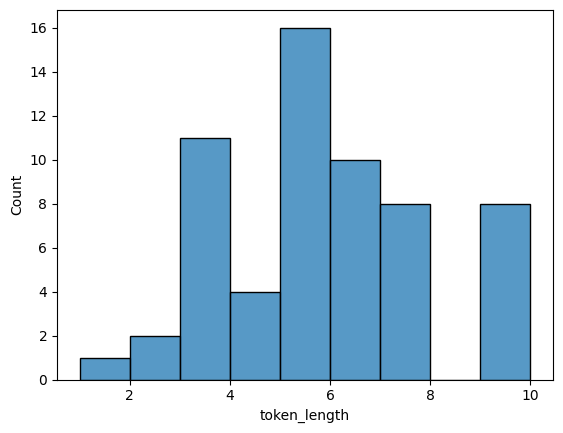

In [39]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Obtain token overlaps with annotations

In [7]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
2,1,681,683,AAC,-0.010186,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
...,...,...,...,...,...,...,...,...,...,...,...
92771815,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771816,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771817,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771818,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069


## Obtain annotation overlapping with top tokens

In [40]:
import pandas as pd

from pathlib import Path


for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    tokensDf = highscoreDf[highscoreDf.token_length == tokenLengthCutoff]
    signatureTokens = tokensDf.tokens.unique()
    tokenOverlapsDfs = []
    for signatureToken in signatureTokens:
        tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
        tokenOverlapsDfs.append(tokenOverlapsDf)
    if tokenOverlapsDfs:
        finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
        finalTokenOverlapsDf.drop_duplicates().to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'constant_score_overlaping_annotations_tl_' + str(tokenLengthCutoff) + '.csv'), index=False)

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Create data for an upset plot

In [41]:
import os

from pathlib import Path

import pandas as pd


overlappingGenesDict = {}
overlappingAnnotationsDict = {}

for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    overlappingGenesPath = Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'constant_score_overlaping_annotations_tl_' + str(tokenLengthCutoff) + '.csv')
    if overlappingGenesPath.exists():
        overlappingGenesDf = pd.read_csv(overlappingGenesPath)
        overlappingGenesDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf.gene.unique()
        overlappingAnnotationsDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Generate upset plot

/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

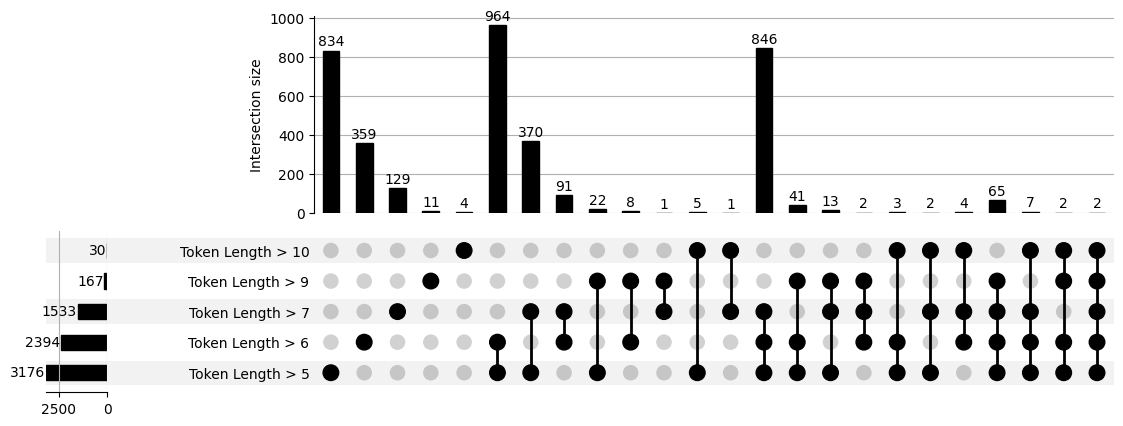

In [42]:
from upsetplot import UpSet

from upsetplot import from_contents


ax_dict = UpSet(from_contents(overlappingGenesDict), show_counts=True).plot()

## Obtain common genes

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 9`, `Token Length > 10`

In [78]:
import numpy as np


set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items()])

{'lysR'}

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 9`, `Token Length > 10`

In [ ]:
import numpy as np


set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 7'))])

{'lysR', 'relE', 'tdcA'}

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 10`

In [ ]:
import numpy as np


set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 9'))])

{'cusC', 'dnaG', 'lysR', 'msyB', 'vgrG', 'vgrG1', 'xerD', 'yjeM'}